In [1]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 100)

Addison Sengvilay, Ben Lucking, Marleigh Poulsen, Xinbo Lu, Yejie Shin <br>GEOG469 
<br>June, 2019
<br>
# Northwest Justice Project 2019
### 1. Background and Problem Statement
*Section Description: Section 1 summarizes the context of our project along with the problem we are working to explore, further understand, and help the Northwest Justice Project to address.*
<br>
<br>The Washington Growth Management Act has been in play for just about thirty years forming the basis of comprehensive planning efforts for cities across Washington including Spokane, Seattle, Tacoma, and the Tri-Cities. Our sponsor, the Northwest Justice Project, does a great deal of legal work in helping provide equal opportunity in housing with a focus on the lower income brackets. Our team, alongside the Northwest Justice Project, wanted to explore how housing availability and affordability have changed for people within different income brackets over the last thirty years in the context of the Growth Management Act. Using data analysis and mapping software, we have created an interactive map and several other deliverables that will enable the Northwest Justice Project to further understand what income brackets might be doing well or poorly with housing availability and affordability. This might provide valuable insight into what might need to be changed in order to allow equal opportunity for housing across income brackets. 

### 2. System Requirements
*Section Description: Section 2 moves through all of the requirements required to complete this project. This includes labor requirements, technical requirements, and institutional requirements. This section shows the quantity of resources required to complete a project of this magnitude.* 

#### 2.1 Data Requirements
We will use decennial census data from 1990 and 2000 and American Community Survey data five-year estimate from 2010 and 2017. Right now we have acquired and formatted data from 1990 and 2017 and are proceeding with this data until we have a “minimum viable product”. If we have time after creating our maps with this data, we will go back and fill in the middle years of 2000 and 2010. For housing data, we mainly want to know how much both renters and owners spend on their housing as a percentage of their income. The percentage of income that an individual or household spends on their housing is called “housing burden”. For income data, we want to know the distribution of different income levels, as well as how those income levels compare to the area median income (AMI). The two measures of income levels and housing burden exist in a cross-tabulated format at the census tract level for all the years we are focusing on. 

Demographic data will be used to see if there are patterns in which census tracts are more affordable. We are currently only using census race categories, but hope to include data on language spoken at home, country of birth, household size and family size data as well if time allows. We might use geographic crosswalks from the National Historic Geographic Information System (NHGIS) to be able to compare data consistently across years despite variation in census tract boundaries. 

#### 2.1.1 Entity Classes:

The following entity classes give a good idea of the type of data we are collecting, but are not a complete picture of every variable we are looking at for the sake of brevity. Every cross-tabulated variable set contains n fields where n = (number of income brackets) * (number of housing spending percentage brackets). The 1990 dataset for instance contains 30 fields each for both renter and homeowner monthly housing costs as a percentage of household income. In this table we express cross-tabulated fieldsets as a single field to save space. 


### Exploratory Data Analysis

#### 1. Data preparation

In [2]:
## use pandas to read csv files: 1990 csv and 2017 csv
tract2017 = pd.read_csv('ACS2017cleaned.csv').copy() 
tract1990= pd.read_csv('Tract_1990_Data.csv').copy()

## use geopandas to read shapefile: census tract 2010
## The orginal shapefile includes watershed. We managed to take it off to make the tracts more recognizable 
tract_shp = gpd.read_file('C:/Users/LXB19/Documents/NWJ2019/Tract10_nowater/Tract10_nowater.shp').copy()
tract_shp = tract_shp.to_crs(epsg=2926)
## rename column to prepare for joins
tract2017.rename(columns = {'Geo_FIPS': 'GEOID10'}, inplace = True)
tract1990 = tract1990.rename(columns={'Geo_FIPS': 'GEOID10'})

## the GEOID10 column was considered as python 'Object', and 'object' type cannot join with integer.
## We converted the 'object' type to numeric
tract_shp.GEOID10 = pd.to_numeric(tract_shp.GEOID10)


In [3]:
## Join csv with tract shapefile
tract2017_joined = tract_shp.merge(tract2017, on='GEOID10')
tract1990_joined = tract_shp.merge(tract1990, on='GEOID10', how = 'outer')
tract1990_joined.fillna(0,inplace = True)

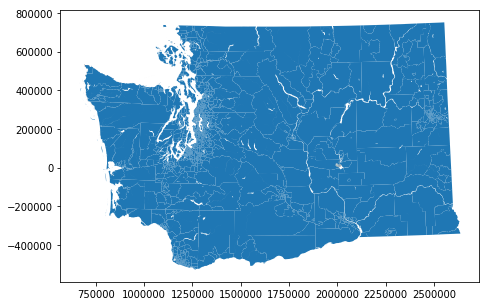

In [4]:
## viewing 1990 data, plot
tract1990_joined.plot(figsize = (8,5))

In [5]:
## viewing 2017 data, data table
tract2017_joined.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,INTPTLON10,INTPTLAT10,ALANDM,AWATERM,ALANDMI,AWATERMI,POP10,HHP10,GQ10,HU10,OHU10,POPWHITE,POPBLACK,POPAIAN,POPASIAN,POPNHOPI,POPOTH,POPTWO,POPHISP,POPWHITE2,POPBLACK2,POPAIAN2,POPASIAN2,POPNHOPI2,POPOTH2,POPTWO2,geometry,Geo_GEOID,TotalPop17,White17,Black17,Native17,Asian17,API17,SORace17,ToMRace17,ToMRInc17,ToMRoT17,ACS17_5yr_B02001001s,ACS17_5yr_B02001002s,ACS17_5yr_B02001003s,ACS17_5yr_B02001004s,...,O20k3p17,O20k4p17,O20k5p17,O20k6p17,O20kNC17,O35kp17,O35k0p17,O35k1p17,O35k2p17,O35k3p17,O35k4p17,O35k5p17,O35k6p17,O35kNC17,O50kp17,O50k0p17,O50k1p17,O50k2p17,O50k3p17,O50k4p17,O50k5p17,O50k6p17,O50kNC17,O75kp17,O75k0p17,O75k1p17,O75k2p17,O75k3p17,O75k4p17,O75k5p17,O75k6p17,O75kNC17,O100kp17,O100k0p17,O100k1p17,O100k2p17,O100k3p17,O100k4p17,O100k5p17,O100k6p17,O100kNC17,O150kp17,O150k0p17,O150k1p17,O150k2p17,O150k3p17,O150k4p17,O150k5p17,O150k6p17,O150kNC17
0,53,001,950100,53001950100,9501,Census Tract 9501,G5020,S,-118.398815,47.150809,1615431075,7748364,623.721,2.992,2447,2388,59,1228,1041,2326,2,24,11,0,44,40,112,2270,2,23,9,0,0,31,(POLYGON Z ((2160320.481496233 35368.095220899...,14000US53001950100,2402,2144,7,29,37,0,70,115,18,97,106.060606,103.030303,9.090909,17.575758,...,35,3,3,3,0,133,64,15,8,15,21,0,10,0,170,136,24,6,0,0,4,0,0,58,40,11,4,0,3,0,0,0,76,62,7,0,0,0,7,0,0,53,53,0,0,0,0,0,0,0
1,53,001,950200,53001950200,9502,Census Tract 9502,G5020,S,-118.509265,46.925269,2629508838,2258723,1015.259,0.872,1738,1738,0,844,699,1524,24,10,12,2,123,43,202,1459,21,10,11,2,0,33,(POLYGON Z ((2118939.173328196 -26397.58793038...,14000US53001950200,1688,1601,0,6,10,0,17,54,4,50,107.272727,100.000000,7.272727,5.454545,...,1,8,0,10,0,22,17,1,0,0,4,0,0,0,163,138,21,4,0,0,0,0,0,75,75,0,0,0,0,0,0,0,42,39,0,3,0,0,0,0,0,23,23,0,0,0,0,0,0,0
2,53,001,950300,53001950300,9503,Census Tract 9503,G5020,S,-119.118131,46.832891,724946603,2616212,279.903,1.010,6934,6905,29,1910,1801,3747,48,164,15,2,2747,211,5063,1788,18,15,10,1,6,33,POLYGON Z ((2113665.390270874 -26495.245423248...,14000US53001950300,6834,4238,35,225,0,0,2318,18,0,18,230.909091,368.484848,29.696970,143.030303,...,73,24,9,55,0,164,83,39,0,10,11,9,12,0,163,86,35,24,0,13,0,5,0,198,116,51,22,9,0,0,0,0,84,70,0,5,9,0,0,0,0,132,132,0,0,0,0,0,0,0
3,53,001,950400,53001950400,9504,Census Tract 9504,G5020,S,-119.166368,46.832378,3396313,0,1.311,0.000,2856,2782,74,921,882,1764,13,50,29,0,928,72,1973,838,2,3,25,0,3,12,POLYGON Z ((2060699.393847891 -54788.439034157...,14000US53001950400,3298,2195,8,57,124,0,852,62,21,41,199.393939,238.181818,10.303030,65.454545,...,5,4,8,9,0,81,14,7,31,8,0,0,21,0,66,55,6,0,5,0,0,0,0,111,110,0,0,1,0,0,0,0,69,61,0,8,0,0,0,0,0,23,23,0,0,0,0,0,0,0
4,53,001,950500,53001950500,9505,Census Tract 9505,G5020,S,-119.159914,46.810568,12385967,0,4.782,0.000,4753,4753,0,1339,1297,2342,22,108,58,0,2057,166,3749,907,4,25,44,0,9,15,POLYGON Z ((2065844.56629899 -58670.9246902823...,14000US53001950500,5039,3318,63,239,57,0,1294,68,12,56,260.606061,386.666667,56.363636,207.878788,...,0,0,11,33,0,129,49,26,0,40,14,0,0,0,285,77,86,41,39,42,0,0,0,254,113,129,12,0,0,0,0,0,101,90,11,0,0,0,0,0,0,32,32,0,0,0,0,0,0,0


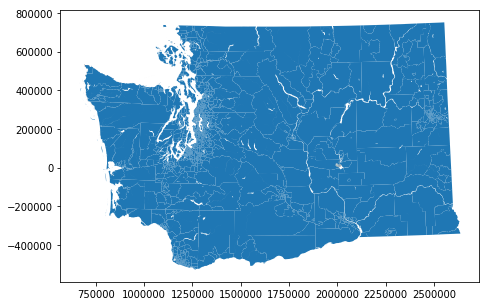

In [6]:
## viewing 2017 data, plot
tract2017_joined.plot(figsize = (8,5))

## Split countyies

In [7]:
tract1990_copy = tract1990_joined.copy()
tract2017_copy = tract2017_joined.copy()

In [8]:
tract1990_copy.set_index('COUNTYFP10', inplace =True)

In [9]:
tract2017_copy.set_index('COUNTYFP10',inplace = True)

In [10]:
king1990 = tract1990_copy.loc['033'].copy()
king1990['UnitsPerPerson'] = king1990['HUnits90']/king1990['TotalHH90']

In [11]:
king2017 = tract2017_copy.loc['033'].copy()
king2017['UnitsPerPerson'] = king2017['HUnits17']/king2017['TotalPop17']
king2017['GRUnder10k35pctMore'] = king2017['R10k4p17']+king2017['R10k5p17']+king2017['R10k6p17']
king2017['OCUnder10k35pctMore'] = king2017['O0k4p17']+king2017['O0k5p17']+king2017['O0k6p17']

In [12]:
pierce1990 = tract1990_copy.loc['053'].copy()
pierce1990['UnitsPerPerson'] = pierce1990['HUnits90']/pierce1990['TotalHH90']

In [14]:
pierce2017 = tract2017_copy.loc['053'].copy()
pierce2017['UnitsPerPerson'] = pierce2017['HUnits17']/pierce2017['TotalPop17']
pierce2017['GRUnder10k35pctMore'] = pierce2017['R10k4p17']+pierce2017['R10k5p17']+pierce2017['R10k6p17']
pierce2017['OCUnder10k35pctMore'] = pierce2017['O0k4p17']+pierce2017['O0k5p17']+pierce2017['O0k6p17']

In [47]:
spokane1990 = tract1990_copy.loc['063'].copy()
spokane1990['UnitsPerPerson'] = spokane1990['HUnits90']/spokane1990['TotalHH90']

In [48]:
spokane2017 = tract2017_copy.loc['063'].copy()
spokane2017['UnitsPerPerson'] = spokane2017['HUnits17']/spokane2017['TotalPop17']
spokane2017['GRUnder10k35pctMore'] = spokane2017['R10k4p17']+spokane2017['R10k5p17']+spokane2017['R10k6p17']
spokane2017['OCUnder10k35pctMore'] = spokane2017['O0k4p17']+spokane2017['O0k5p17']+spokane2017['O0k6p17']

In [80]:
benton1990 = tract1990_copy.loc['005'].copy()
benton1990['UnitsPerPerson'] = benton1990['HUnits90']/benton1990['TotalHH90']

In [81]:
benton2017 = tract2017_copy.loc['005'].copy()
benton2017['UnitsPerPerson'] = benton2017['HUnits17']/benton2017['TotalPop17']
benton2017['GRUnder10k35pctMore'] = benton2017['R10k4p17']+benton2017['R10k5p17']+benton2017['R10k6p17']
benton2017['OCUnder10k35pctMore'] = benton2017['O0k4p17']+benton2017['O0k5p17']+benton2017['O0k6p17']

In [99]:
franklin1990 = tract1990_copy.loc['021'].copy()
franklin1990['UnitsPerPerson'] = franklin1990['HUnits90']/franklin1990['TotalHH90']

In [100]:
franklin2017 = tract2017_copy.loc['021'].copy()
franklin2017['UnitsPerPerson'] = franklin2017['HUnits17']/franklin2017['TotalPop17']
franklin2017['GRUnder10k35pctMore'] = franklin2017['R10k4p17']+franklin2017['R10k5p17']+franklin2017['R10k6p17']
franklin2017['OCUnder10k35pctMore'] = franklin2017['O0k4p17']+franklin2017['O0k5p17']+franklin2017['O0k6p17']

In [ ]:
walla1990 = tract1990_copy.loc['071'].copy()

In [ ]:
walla2017 = tract2017_copy.loc['071'].copy()

## Bokeh Plotting

In [20]:
from bokeh.plotting import figure, output_file, output_notebook, show
from bokeh.models import GeoJSONDataSource, HoverTool, LinearColorMapper, LogTicker, ColorBar
from bokeh.palettes import Blues5 as palette
from matplotlib import cm
from bokeh.layouts import column
from bokeh.io import output_notebook
output_notebook()
palette = palette[::-1]
color_mapper = LinearColorMapper(palette=palette)

Loading BokehJS ...

In [53]:
def makePlot(title,source, width, height, field,titleSize, popup):
    p = figure(title=title,plot_width = width, plot_height = height)
    p.patches('xs', 'ys', source = source, fill_color = {'field': field, 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
    p.title.text_font_size = titleSize
    p.xaxis.visible = False
    p.yaxis.visible = False
    tooltip = HoverTool()
    tooltip.tooltips = [('Block ID', '@GEOID10'), ('Total Population:', popup)]
    p.add_tools(tooltip)
    return show(p)

### King County Data Analysis

In [ ]:
king1990_geosource = GeoJSONDataSource(geojson=king1990.to_json())

In [ ]:
king2017_geosource = GeoJSONDataSource(geojson=king2017.to_json())

In [ ]:
king1990_plot = figure(title = 'King County 1990 Census Tract: Total Population', 
           plot_width = 800, plot_height = 600)
king1990_plot.patches('xs', 'ys', source = king1990_geosource, fill_color = {'field': 'TotalPop90', 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
king1990_plot.title.text_font_size = '18pt'
king1990_plot.xaxis.visible = False
king1990_plot.yaxis.visible = False
tooltip = HoverTool()
tooltip.tooltips = [('Block ID', '@GEOID10'),
                    ('Total Population:', '@TotalPop90')]
king1990_plot.add_tools(tooltip)
show(king1990_plot)

In [ ]:

king2017_plot = figure(title = 'King County 2017 Census Tract: Total Population', 
           plot_width = 800, plot_height = 600)
king2017_plot.patches('xs', 'ys', source = king2017_geosource, fill_color = {'field': 'TotalPop17', 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
king2017_plot.title.text_font_size = '18pt'
king2017_plot.xaxis.visible = False
king2017_plot.yaxis.visible = False
tooltip = HoverTool()
tooltip.tooltips = [('Block ID', '@GEOID10'),
                    ('Total Population:', '@TotalPop17')]
king2017_plot.add_tools(tooltip)
show(king2017_plot)

In [ ]:
king1990_plot = figure(title = 'King County 1990 Census Tract: Housing Units Per Person', 
           plot_width = 800, plot_height = 600)
king1990_plot.patches('xs', 'ys', source = king1990_geosource, fill_color = {'field': 'UnitsPerPerson', 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
king1990_plot.title.text_font_size = '18pt'
king1990_plot.xaxis.visible = False
king1990_plot.yaxis.visible = False
tooltip = HoverTool()
tooltip.tooltips = [('Block ID', '@GEOID10'),
                    ('Housing Units Per Person:', '@UnitsPerPerson')]
king1990_plot.add_tools(tooltip)
show(king1990_plot)

In [ ]:
king2017_plot = figure(title = 'King County 1990 Census Tract: Housing Units Per Person', 
           plot_width = 800, plot_height = 600)
king2017_plot.patches('xs', 'ys', source = king2017_geosource, fill_color = {'field': 'UnitsPerPerson', 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
king2017_plot.title.text_font_size = '18pt'
king2017_plot.xaxis.visible = False
king2017_plot.yaxis.visible = False
tooltip = HoverTool()
tooltip.tooltips = [('Block ID', '@GEOID10'),
                    ('Housing Units Per Person:', '@UnitsPerPerson')]
king2017_plot.add_tools(tooltip)
show(king2017_plot)

In [ ]:
king1990_plot = figure(title = 'King County 1990: Household Income Less Than 10,000, Gross Rent as Percentage of Income 35% more',
           plot_width = 800, plot_height = 600)
king1990_plot.patches('xs', 'ys', source = king1990_geosource, fill_color = {'field': 'R0k4p90', 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
king1990_plot.title.text_font_size = '12pt'
king1990_plot.xaxis.visible = False
king1990_plot.yaxis.visible = False
tooltip = HoverTool()
tooltip.tooltips = [('Block ID', '@GEOID10'),
                    ('Number of Households:', '@R0k4p90')]
king1990_plot.add_tools(tooltip)
show(king1990_plot)

In [ ]:
king2017_plot = figure(title = 'King County 2017: Household Income Less Than 10,000, Gross Rent as Percentage of Income 35% more', 
           plot_width = 800, plot_height = 600)
king2017_plot.patches('xs', 'ys', source = king2017_geosource, fill_color = {'field': 'GRUnder10k35pctMore', 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
king2017_plot.title.text_font_size = '12pt'
king2017_plot.xaxis.visible = False
king2017_plot.yaxis.visible = False
tooltip = HoverTool()
tooltip.tooltips = [('Block ID', '@GEOID10'),
                    ('Number of Households:', '@Under10k35pctMore')]
king2017_plot.add_tools(tooltip)
show(king2017_plot)

In [ ]:
king1990_plot = figure(title = 'King County 1990: Household Income Less Than 10,000, Owner Cost as Percentage of Income 35% more',
           plot_width = 800, plot_height = 600)
king1990_plot.patches('xs', 'ys', source = king1990_geosource, fill_color = {'field': 'O0k4p90', 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
king1990_plot.title.text_font_size = '12pt'
king1990_plot.xaxis.visible = False
king1990_plot.yaxis.visible = False
tooltip = HoverTool()
tooltip.tooltips = [('Block ID', '@GEOID10'),
                    ('Number of Households:', '@O0k4p90')]
king1990_plot.add_tools(tooltip)
show(king1990_plot)

In [ ]:
king2017_plot = figure(title = 'King County 1990: Household Income Less Than 10,000, Owner Cost as Percentage of Income 35% more',
           plot_width = 800, plot_height = 600)
king2017_plot.patches('xs', 'ys', source = king2017_geosource, fill_color = {'field': 'OCUnder10k35pctMore', 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
king2017_plot.title.text_font_size = '12pt'
king2017_plot.xaxis.visible = False
king2017_plot.yaxis.visible = False
tooltip = HoverTool()
tooltip.tooltips = [('Block ID', '@GEOID10'),
                    ('Number of Households:', '@O0k4p90')]
king2017_plot.add_tools(tooltip)
show(king2017_plot)

### Pierce County Data Analysis

In [ ]:
pierce1990_geosource = GeoJSONDataSource(geojson=pierce1990.to_json())

In [ ]:
pierce2017_geosource = GeoJSONDataSource(geojson=pierce2017.to_json())

In [ ]:
pierce1990_plot = figure(title = 'Pierce County 1990 Census Tract: Total Population', 
           plot_width = 800, plot_height = 600)
pierce1990_plot.patches('xs', 'ys', source = pierce1990_geosource, fill_color = {'field': 'TotalPop90', 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
pierce1990_plot.title.text_font_size = '18pt'
pierce1990_plot.xaxis.visible = False
pierce1990_plot.yaxis.visible = False
tooltip = HoverTool()
tooltip.tooltips = [('Block ID', '@GEOID10'),
                    ('Total Population:', '@TotalPop90')]
pierce1990_plot.add_tools(tooltip)
show(pierce1990_plot)

In [ ]:
pierce2017_plot = figure(title = 'Pierce County 2017 Census Tract: Total Population', 
           plot_width = 800, plot_height = 600)
pierce2017_plot.patches('xs', 'ys', source = pierce2017_geosource, fill_color = {'field': 'TotalPop17', 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
pierce2017_plot.title.text_font_size = '18pt'
pierce2017_plot.xaxis.visible = False
pierce2017_plot.yaxis.visible = False
tooltip = HoverTool()
tooltip.tooltips = [('Block ID', '@GEOID10'),
                    ('Total Population:', '@TotalPop17')]
pierce2017_plot.add_tools(tooltip)
show(pierce2017_plot)

In [ ]:
pierce1990_plot = figure(title = 'Pierce County 1990 Census Tract: Housing Units Per Person', 
           plot_width = 800, plot_height = 600)
pierce1990_plot.patches('xs', 'ys', source = pierce1990_geosource, fill_color = {'field': 'UnitsPerPerson', 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
pierce1990_plot.title.text_font_size = '18pt'
pierce1990_plot.xaxis.visible = False
pierce1990_plot.yaxis.visible = False
tooltip = HoverTool()
tooltip.tooltips = [('Block ID', '@GEOID10'),
                    ('Total Population:', '@UnitsPerPerson')]
pierce1990_plot.add_tools(tooltip)
show(pierce1990_plot)

In [ ]:
pierce2017_plot = figure(title = 'Pierce County 2017 Census Tract: Units Per Person', 
           plot_width = 800, plot_height = 600)
pierce2017_plot.patches('xs', 'ys', source = pierce2017_geosource, fill_color = {'field': 'TotalPop17', 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
pierce2017_plot.title.text_font_size = '18pt'
pierce2017_plot.xaxis.visible = False
pierce2017_plot.yaxis.visible = False
tooltip = HoverTool()
tooltip.tooltips = [('Block ID', '@GEOID10'),
                    ('Total Population:', '@UnitsPerPerson')]
pierce2017_plot.add_tools(tooltip)
show(pierce2017_plot)

In [ ]:
pierce1990_plot = figure(title = 'Pierce CTY 1990 Census Tract: Household Income < 10000, Gross Rent as Percentage of Income >= 35%', 
           plot_width = 800, plot_height = 600)
pierce1990_plot.patches('xs', 'ys', source = pierce1990_geosource, fill_color = {'field': 'R0k4p90', 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
pierce1990_plot.title.text_font_size = '12pt'
pierce1990_plot.xaxis.visible = False
pierce1990_plot.yaxis.visible = False
tooltip = HoverTool()
tooltip.tooltips = [('Block ID', '@GEOID10'),
                    ('Total Population:', '@R0k4p90')]
pierce1990_plot.add_tools(tooltip)
show(pierce1990_plot)

In [ ]:
pierce2017_plot = figure(title = 'Pierce CTY 2017: Household Income < 10000, Gross Rent as Percentage of Income >= 35%', 
           plot_width = 800, plot_height = 600)
pierce2017_plot.patches('xs', 'ys', source = pierce2017_geosource, fill_color = {'field': 'GRUnder10k35pctMore', 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
pierce2017_plot.title.text_font_size = '12pt'
pierce2017_plot.xaxis.visible = False
pierce2017_plot.yaxis.visible = False
tooltip = HoverTool()
tooltip.tooltips = [('Block ID', '@GEOID10'),
                    ('Number of Households:', '@Under10k35pctMore')]
pierce2017_plot.add_tools(tooltip)
show(pierce2017_plot)

In [ ]:
pierce1990_plot = figure(title = 'Pierce CTY 1990: Household Income < 10,000, Owner Cost as Percentage of Income >= 35%',
           plot_width = 800, plot_height = 600)
pierce1990_plot.patches('xs', 'ys', source = pierce1990_geosource, fill_color = {'field': 'O0k4p90', 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
pierce1990_plot.title.text_font_size = '12pt'
pierce1990_plot.xaxis.visible = False
pierce1990_plot.yaxis.visible = False
tooltip = HoverTool()
tooltip.tooltips = [('Block ID', '@GEOID10'),
                    ('Number of Households:', '@O0k4p90')]
king1990_plot.add_tools(tooltip)
show(pierce1990_plot)

In [ ]:
pierce2017_plot = figure(title = 'Pierce CTY 1990: Household Income < 10,000, Owner Cost as Percentage of Income >= 35%',
           plot_width = 800, plot_height = 600)
pierce2017_plot.patches('xs', 'ys', source = pierce2017_geosource, fill_color = {'field': 'OCUnder10k35pctMore', 'transform':color_mapper}, fill_alpha = 1.0, 
          line_color = "black", line_width = 0.1)
pierce2017_plot.title.text_font_size = '12pt'
pierce2017_plot.xaxis.visible = False
pierce2017_plot.yaxis.visible = False
tooltip = HoverTool()
tooltip.tooltips = [('Block ID', '@GEOID10'),
                    ('Number of Households:', '@O0k4p90')]
pierce2017_plot.add_tools(tooltip)
show(pierce2017_plot)

### Spokane County Data Analysis

In [23]:
spokane1990_geosource = GeoJSONDataSource(geojson=spokane1990.to_json())

In [55]:
spokane2017_geosource = GeoJSONDataSource(geojson=spokane2017.to_json())

In [ ]:
spokane1990_plot = makePlot(title = 'Spokane County 1990 Census Tract: Total Population', 
                              width = 800, height = 800,
                              source = spokane1990_geosource, field = 'TotalPop90', 
                              titleSize = '18pt', popup='@TotalPop90' )

In [ ]:
spokane2017_plot = makePlot(title = 'Spokane County 2017 Census Tract: Total Population', 
                              width = 800, height = 800,
                              source = spokane2017_geosource, field = 'TotalPop17', 
                              titleSize = '18pt', popup='@TotalPop17' )

In [ ]:
spokane1990_plot = makePlot(title = 'Spokane County 1990 Census Tract: Housing Unit Per Person', 
                              width = 800, height = 800,
                              source = spokane1990_geosource, field = 'UnitsPerPerson', 
                              titleSize = '18pt', popup='@UnitsPerPerson' )

In [ ]:
spokane2017_plot = makePlot(title = 'Spokane County 2017 Census Tract: Housing Unit Per Person', 
                              width = 800, height = 800,
                              source = spokane2017_geosource, field = 'UnitsPerPerson', 
                              titleSize = '18pt', popup='@UnitsPerPerson' )

In [ ]:
spokane1990_plot = makePlot(title = 'Spokane CTY 1990 Census Tract: Household Income < 10000, Gross Rent as Percentage of Income >= 35%', 
                              width = 750, height = 800,
                              source = spokane1990_geosource, field = 'R0k4p90', 
                              titleSize = '11pt', popup='@R0k4p90' )

In [ ]:
spokane2017_plot = makePlot(title = 'Spokane CTY 2017 Census Tract: Household Income < 10000, Gross Rent as Percentage of Income >= 35%', 
                              width = 750, height = 800,
                              source = spokane2017_geosource, field = 'GRUnder10k35pctMore', 
                              titleSize = '11pt', popup='@GRUnder10k35pctMore' )

In [ ]:
spokane1990_plot = makePlot(title = 'Spokane CTY 1990 Census Tract: 1990: Household Income < 10,000, Owner Cost as Percentage of Income >= 35%', 
                              width = 750, height = 800,
                              source = spokane1990_geosource, field = 'O0k4p90', 
                              titleSize = '10pt', popup='@O0k4p90' )

In [ ]:
spokane2017_plot = makePlot(title = 'Spokane CTY 2017 Census Tract: 1990: Household Income < 10,000, Owner Cost as Percentage of Income >= 35%', 
                              width = 750, height = 800,
                              source = spokane2017_geosource, field = 'OCUnder10k35pctMore', 
                              titleSize = '10pt', popup='@OCUnder10k35pctMore' )

### Benton County Data Analysis

In [ ]:
benton1990_geosource = GeoJSONDataSource(geojson=benton1990.to_json())

In [ ]:
benton2017_geosource = GeoJSONDataSource(geojson=benton2017.to_json())

In [ ]:
benton1990_plot = makePlot(title = 'Benton County 1990 Census Tract: Total Population', 
                              width = 800, height = 800,
                              source = benton1990_geosource, field = 'TotalPop90', 
                              titleSize = '18pt', popup='@TotalPop90' )

In [ ]:
benton2017_plot = makePlot(title = 'Benton County 2017 Census Tract: Total Population', 
                              width = 800, height = 800,
                              source = benton2017_geosource, field = 'TotalPop17', 
                              titleSize = '18pt', popup='@TotalPop17' )

In [ ]:
benton1990_plot = makePlot(title = 'Benton County 1990 Census Tract: Housing Unit Per Person', 
                              width = 800, height = 800,
                              source = benton1990_geosource, field = 'UnitsPerPerson', 
                              titleSize = '18pt', popup='@UnitsPerPerson' )

In [ ]:
benton2017_plot = makePlot(title = 'Benton County 2017 Census Tract: Housing Unit Per Person', 
                              width = 800, height = 800,
                              source = benton2017_geosource, field = 'UnitsPerPerson', 
                              titleSize = '18pt', popup='@UnitsPerPerson' )

In [ ]:
benton1990_plot = makePlot(title = 'Benton CTY 1990 Census Tract: Household Income < 10000, Gross Rent as Percentage of Income >= 35%', 
                              width = 800, height = 800,
                              source = benton1990_geosource, field = 'R0k4p90', 
                              titleSize = '11pt', popup='@R0k4p90' )

In [ ]:
benton2017_plot = makePlot(title = 'Benton CTY 2017 Census Tract: Household Income < 10000, Gross Rent as Percentage of Income >= 35%', 
                              width = 750, height = 800,
                              source = benton2017_geosource, field = 'GRUnder10k35pctMore', 
                              titleSize = '11pt', popup='@GRUnder10k35pctMore' )

In [ ]:
benton1990_plot = makePlot(title = 'Benton CTY 1990 Census Tract: 1990: Household Income < 10,000, Owner Cost as Percentage of Income >= 35%', 
                              width = 800, height = 800,
                              source = benton1990_geosource, field = 'O0k4p90', 
                              titleSize = '10pt', popup='@O0k4p90' )

In [ ]:
benton2017_plot = makePlot(title = 'Benton CTY 2017 Census Tract: 1990: Household Income < 10,000, Owner Cost as Percentage of Income >= 35%', 
                              width = 800, height = 800,
                              source = benton2017_geosource, field = 'OCUnder10k35pctMore', 
                              titleSize = '10pt', popup='@OCUnder10k35pctMore' )

In [101]:
franklin1990_geosource = GeoJSONDataSource(geojson=franklin1990.to_json())

In [ ]:
franklin2017_geosource = GeoJSONDataSource(geojson=franklin2017.to_json())

In [ ]:
franklin1990_plot = makePlot(title = 'Franklin County 1990 Census Tract: Total Population', 
                              width = 800, height = 800,
                              source = franklin1990_geosource, field = 'TotalPop90', 
                              titleSize = '16pt', popup='@TotalPop90' )

In [ ]:
franklin2017_plot = makePlot(title = 'Franklin County 2017 Census Tract: Total Population', 
                              width = 800, height = 800,
                              source = franklin2017_geosource, field = 'TotalPop17', 
                              titleSize = '16pt', popup='@TotalPop17' )

In [ ]:
franklin1990_plot = makePlot(title = 'Franklin County 1990 Census Tract: Housing Unit Per Person', 
                              width = 800, height = 800,
                              source = franklin1990_geosource, field = 'UnitsPerPerson', 
                              titleSize = '18pt', popup='@UnitsPerPerson' )

In [ ]:
franklin2017_plot = makePlot(title = 'Franklin County 2017 Census Tract: Housing Unit Per Person', 
                              width = 800, height = 800,
                              source = franklin2017_geosource, field = 'UnitsPerPerson', 
                              titleSize = '18pt', popup='@UnitsPerPerson' )

In [ ]:
franklin1990_plot = makePlot(title = 'Franklin CTY 1990 Census Tract: Household Income < 10000, Gross Rent as Percentage of Income >= 35%', 
                              width = 800, height = 800,
                              source = franklin1990_geosource, field = 'R0k4p90', 
                              titleSize = '11pt', popup='@R0k4p90' )

In [ ]:
franklin2017_plot = makePlot(title = 'Franklin CTY 2017 Census Tract: Household Income < 10000, Gross Rent as Percentage of Income >= 35%', 
                              width = 800, height = 800,
                              source = franklin2017_geosource, field = 'GRUnder10k35pctMore', 
                              titleSize = '11pt', popup='@GRUnder10k35pctMore' )

In [ ]:
franklin1990_plot = makePlot(title = 'Franklin CTY 1990 Census Tract: 1990: Household Income < 10,000, Owner Cost as Percentage of Income >= 35%', 
                              width = 800, height = 800,
                              source = franklin1990_geosource, field = 'O0k4p90', 
                              titleSize = '10pt', popup='@O0k4p90')

In [ ]:
franklin2017_plot = makePlot(title = 'Franklin CTY 2017 Census Tract: 1990: Household Income < 10,000, Owner Cost as Percentage of Income >= 35%', 
                              width = 800, height = 800,
                              source = franklin2017_geosource, field = 'OCUnder10k35pctMore', 
                              titleSize = '10pt', popup='@OCUnder10k35pctMore' )